### imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### load data

In [14]:
data = pd.read_csv('./Datas/kc_house_data.csv')
data = data.drop(['id', 'date'], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [6]:
## Find the correlation between the variables and find which explanatory variable
## is strongly related to the target variable for the prediction. Here it will be the price.


#### we display the heat map of correlation

<AxesSubplot:>

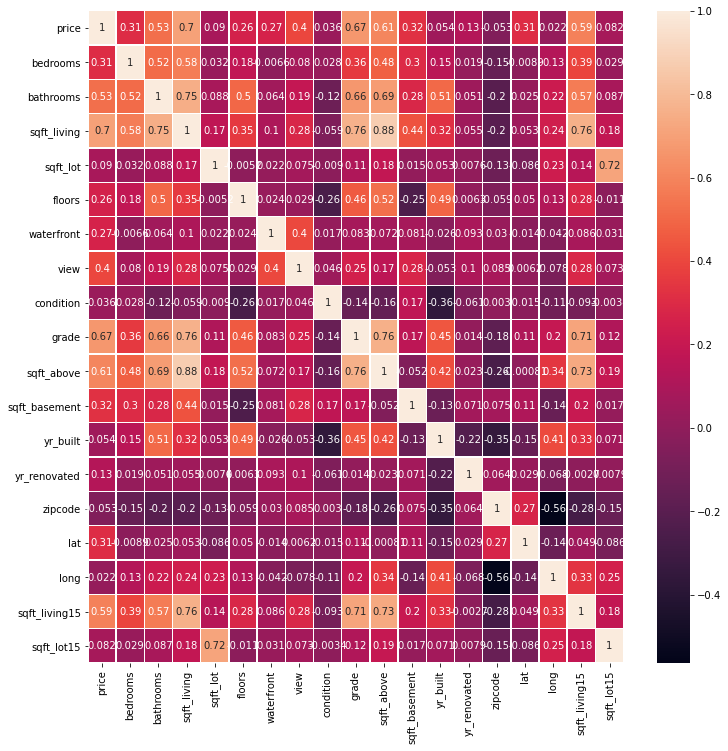

In [16]:
fig, ax = plt.subplots(figsize=(12,12))   
correlations = data.corr()
sns.heatmap(correlations, annot=True, linewidths=.5, ax=ax)

In [17]:
### square_living is the highest 

<AxesSubplot:title={'center':'House Price vs Squared Feet'}, xlabel='Squared Feet', ylabel='House Price (in millions)'>

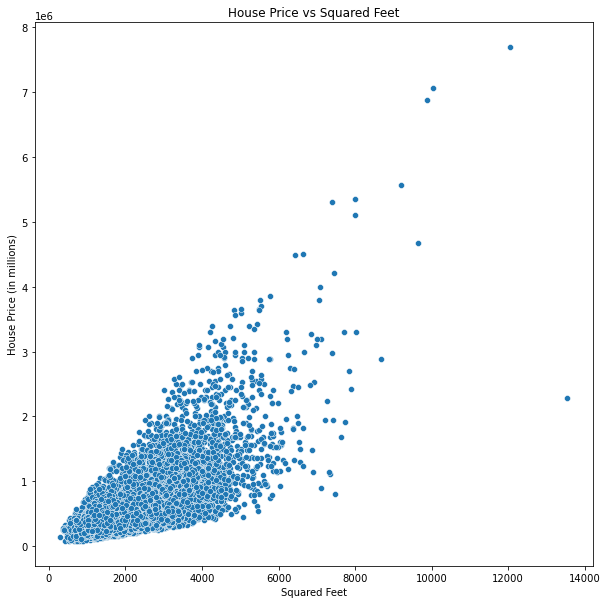

In [25]:
## Plot the House Price vs square feet
fi, ax = plt.subplots(figsize=(10,10)) 
plt.title("House Price vs Squared Feet")
plt.xlabel("Squared Feet")
plt.ylabel("House Price (in millions)")
sns.scatterplot(x='sqft_living', y='price', data=data, ax=ax)


### split into train and test

In [42]:
X = data[['sqft_living']]
Y = data['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X)

       sqft_living
0             1180
1             2570
2              770
3             1960
4             1680
...            ...
21608         1530
21609         2310
21610         1020
21611         1600
21612         1020

[21613 rows x 1 columns]


### train model - linear regression

In [50]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
lr.fit(X_train, Y_train)

## find the intercept and slope of model
print(lr.intercept_) 
print(lr.coef_) 

-48257.0635910281
[283.96855716]


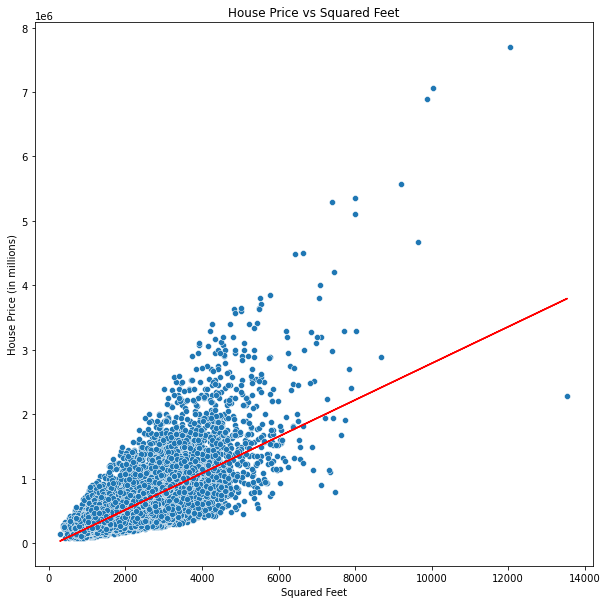

In [48]:
## lines of best fit
fi, ax = plt.subplots(figsize=(10,10)) 
plt.title("House Price vs Squared Feet")
plt.xlabel("Squared Feet")
plt.ylabel("House Price (in millions)")
sns.scatterplot(x='sqft_living', y='price', data=data, ax=ax)
plt.plot(X_train, lr.coef_*X_train+lr.intercept_, '-r', 
        label='Intercept: -48,257 \nSlope: 283.9')

In [54]:
### sample prediction
lr.predict([[600]])
## predict for test data
y_pred = lr.predict(X_test)


In [57]:
### Model evaluation
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error: ' + str(rmse))

Root Mean Squared Error: 248879.06124185043


In [1]:
### Use R-square for better fit for these situations
# Import r2_score module
from sklearn.metrics import r2_score
# Print R2 Score
print(r2_score(Y_test, y_pred))

NameError: name 'Y_test' is not defined